<a href="https://colab.research.google.com/github/Sai63583/codsoft-task2_movierating/blob/main/Movie_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Task-2  : MOVIE RATING PREDICTION WITH PYTHON

        Author  : Sai Ganesh Siddani

        Batch   : January-2024

        Domain  : Data Science

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movie=pd.read_csv("/content/IMDb Movies India.csv")

In [ ]:
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie.shape

(15495, 10)

In [ ]:
movie.describe()

,Year,Rating
count,495.000000,315.000000
mean,-1992.369697,5.629206
std,21.943401,1.300798
min,-2021.000000,2.400000
25%,-2010.500000,4.800000
50%,-1995.000000,5.700000
75%,-1978.500000,6.600000
max,-1933.000000,8.400000


In [ ]:
movie.count()

Name        509
Year        495
Duration    271
Genre       471
Rating      315
Votes       315
Director    497
Actor 1     466
Actor 2     453
Actor 3     429
dtype: int64

In [ ]:
movie.isnull().sum()

Name        14986
Year        15000
Duration    15224
Genre       15024
Rating      15180
Votes       15180
Director    14998
Actor 1     15029
Actor 2     15042
Actor 3     15066
dtype: int64

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15495 entries, 0 to 15494
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      509 non-null    object 
 1   Year      495 non-null    float64
 2   Duration  271 non-null    object 
 3   Genre     471 non-null    object 
 4   Rating    315 non-null    float64
 5   Votes     315 non-null    object 
 6   Director  497 non-null    object 
 7   Actor 1   466 non-null    object 
 8   Actor 2   453 non-null    object 
 9   Actor 3   429 non-null    object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df=movie.columns
print(df)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
movie['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [ ]:
movie['Rating'].value_counts()

4.8    13
5.0    12
6.2    12
6.4    12
5.6    12
5.7    11
6.1     9
6.0     9
6.8     9
6.3     9
5.5     9
6.6     9
5.3     9
7.4     8
7.3     8
5.2     8
6.9     8
6.7     7
3.1     7
4.5     7
7.2     7
6.5     7
5.8     7
4.1     6
4.2     6
5.4     6
3.8     6
4.4     6
5.1     5
4.6     5
4.9     4
7.0     4
4.7     4
7.7     4
8.1     4
7.1     3
4.3     3
3.3     3
7.6     3
3.6     3
3.5     3
8.0     2
2.8     2
7.9     2
4.0     2
5.9     2
3.0     2
7.8     2
3.4     2
3.9     2
7.5     2
3.7     2
3.2     1
2.5     1
8.4     1
2.4     1
2.7     1
2.6     1
Name: Rating, dtype: int64

In [ ]:
movie['Rating'].isnull().sum()

15180

In [ ]:
movie.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
505,Aatish,-1979.0,139 min,Action,4.5,16,Ambrish Sangal,Jeetendra,Neetu Singh,Dheeraj Kumar
506,Aatish: Feel the Fire,-1994.0,155 min,"Action, Crime, Drama",5.8,735,Sanjay Gupta,Sanjay Dutt,Aditya Pancholi,Raveena Tandon
507,Aatma,-2006.0,107 min,"Crime, Drama, Horror",4.2,79,Deepak Ramsay,Kapil Jhaveri,Shabana Raza,Vikram Singh
508,Aatma,-2013.0,100 min,"Drama, Horror, Thriller",3.8,623,Suparn Varma,Jaideep Ahlawat,Bipasha Basu,Padam Bhola


In [ ]:
movie.isna().sum()

Name        14986
Year        15000
Duration    15224
Genre       15024
Rating      15180
Votes       15180
Director    14998
Actor 1     15029
Actor 2     15042
Actor 3     15066
dtype: int64

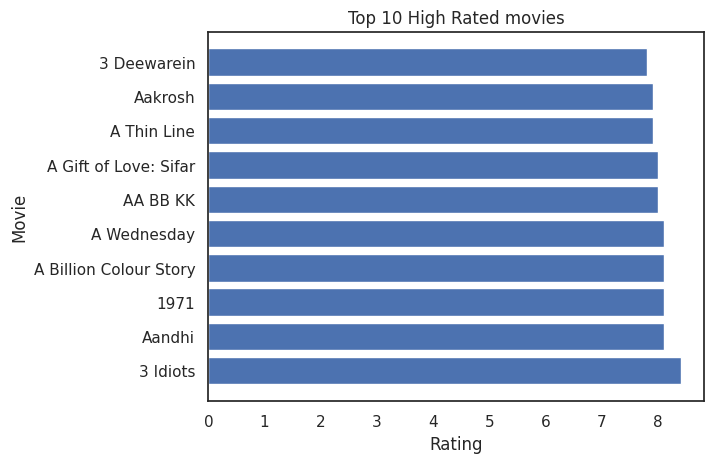

In [ ]:
top_rated_movies=movie.sort_values(by="Rating",ascending=False).head(10)
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'])
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 High Rated movies')
plt.show()

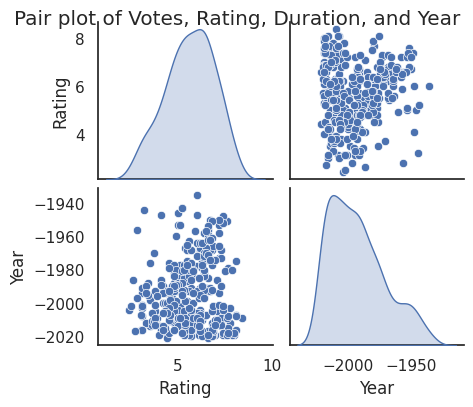

In [ ]:
column_interest = ['Votes', 'Rating', 'Duration', 'Year']

sns.set(style='white')
sns.pairplot(movie[column_interest], diag_kind='kde', markers='o', height=2, aspect=1.2)
plt.suptitle('Pair plot of Votes, Rating, Duration, and Year', y=1)
plt.show()

In [ ]:
movie.dropna(subset=['Votes']).head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df_final=movie.dropna()
df_final.shape

(230, 10)

<ipython-input-30-4a83528b7638>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Movies',y='Actor',data=actor_counts.head(10),palette="Set2")


<function matplotlib.pyplot.show(close=None, block=None)>

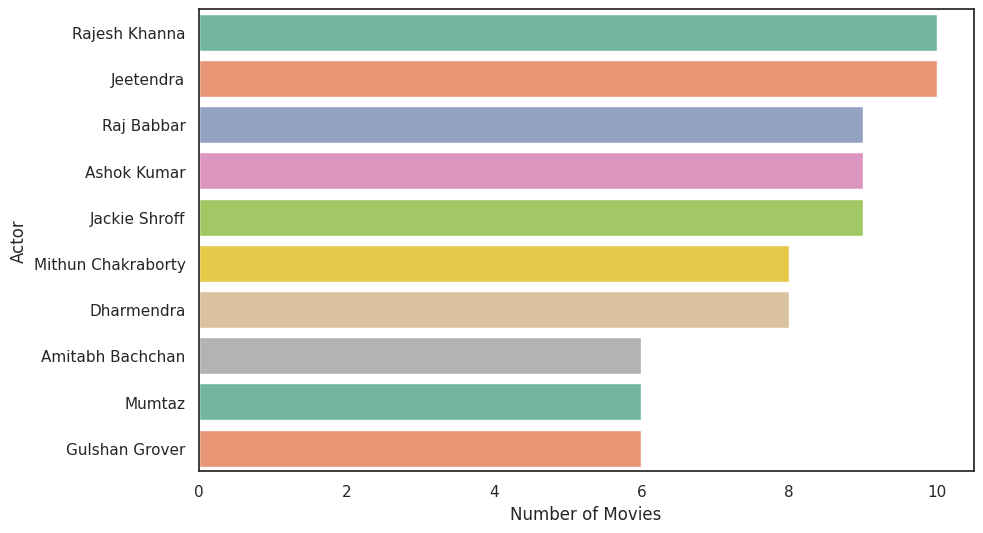

In [ ]:
actors=pd.concat([movie["Actor 1"],movie["Actor 2"],movie["Actor 3"]])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=["Actor","Number of Movies"]
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Movies',y='Actor',data=actor_counts.head(10),palette="Set2")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show

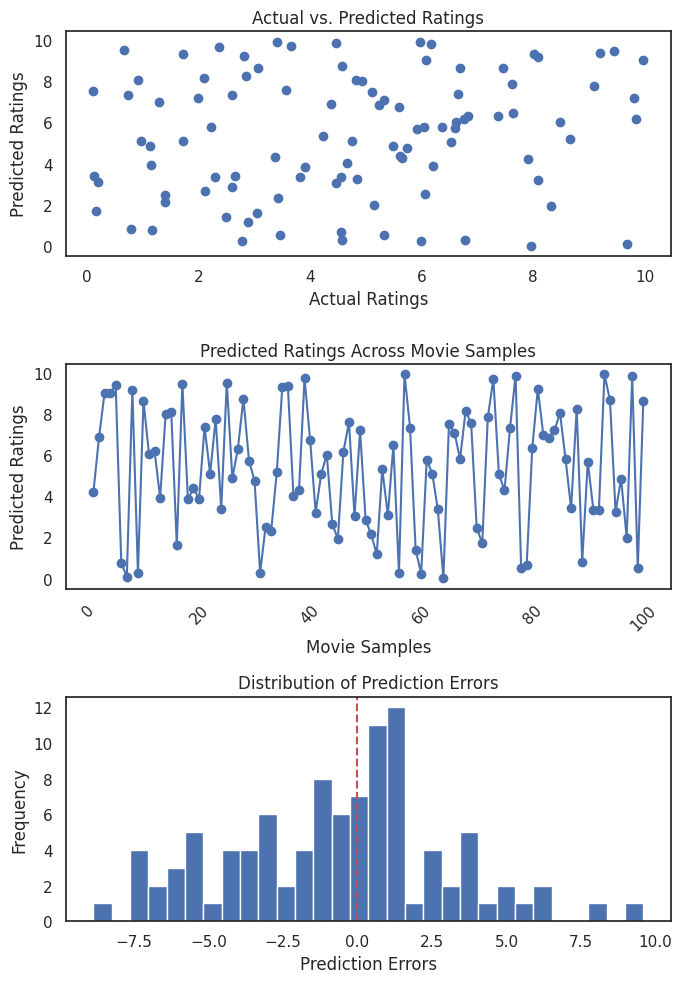

In [ ]:
y_test = np.random.rand(100) *10

y_pred= np.random.rand(100) * 10

errors = y_test-y_pred

fig, axs= plt.subplots (3, 1, figsize = (7, 10))

axs[0].scatter(y_test, y_pred)

axs[0].set_xlabel("Actual Ratings")

axs[0].set_ylabel("Predicted Ratings")

axs[0].set_title("Actual vs. Predicted Ratings")

# Line plot

movie_samples= np.arange(1, len(y_pred) + 1)

axs[1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-')

axs[1].set_xlabel("Movie Samples")

axs[1].set_ylabel("Predicted Ratings")

axs[1].set_title("Predicted Ratings Across Movie Samples")

axs[1].tick_params(axis = 'x', rotation= 45)

#Histogram

axs[2].hist(errors, bins =30)

axs[2].set_xlabel("Prediction Errors")

axs[2].set_ylabel("Frequency")

axs[2].set_title("Distribution of Prediction Errors")

axs[2].axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


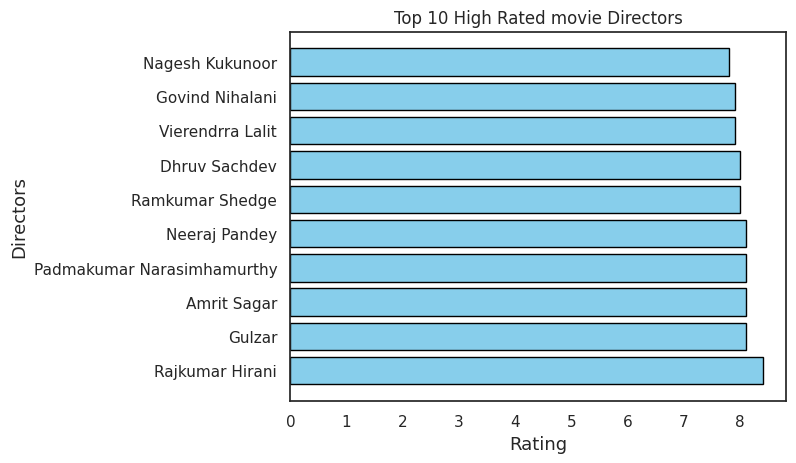

In [ ]:
top_rated_movies=movie.sort_values(by="Rating",ascending=False).head(10)
plt.barh(top_rated_movies['Director'],top_rated_movies['Rating'],edgecolor='black',color='skyblue')
plt.xlabel('Rating',fontsize=13)
plt.ylabel('Directors',fontsize=13)
plt.title('Top 10 High Rated movie Directors')
plt.show()